# Proyecto Tienda Aurelion
**Problema**

La tienda Aurelion necesita analizar patrones de venta para poder tomar decisiones estratégicas. Actualmente se desconoce con certeza cuales son los productos estrella, qué métodos de pago prefieren los clientes y quiénes son los compradores más leales.

## Cargado las tablas e instalación de librerias

#### Primero hago install de las librerias en una terminal



In [1]:
%pip install pandas numpy scikit-learn category_encoders matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Instalo openpyxl para poder trabajar archivos excel


In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Importo las librerias

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import category_encoders as ce
import matplotlib.pyplot as plt

#### (Tabla detalle Ventas) pd.read_excel: para generar el dataframe a partir de la lectura

In [ ]:
path_dataset = r"C:\Users\Nico\Desktop\IBM\Entregas\databases\detalle_ventas.xlsx"
df_detalle_ventas = pd.read_excel(path_dataset)

In [5]:
df_detalle_ventas.head(9)

,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902,2902
1,2,82,Aceitunas Negras 200g,5,2394,11970
2,2,39,Helado Vainilla 1L,5,469,2345
3,2,70,Fernet 750ml,2,4061,8122
4,2,22,Medialunas de Manteca,1,2069,2069
5,2,79,Hamburguesas Congeladas x4,4,2420,9680
6,3,9,Yerba Mate Suave 1kg,2,3878,7756
7,3,2,Pepsi 1.5L,2,4973,9946
8,3,85,Jugo en Polvo Naranja,1,1856,1856


#### Exploro si los data types fueron asignados como corresponde durante del pd.read_excel.

In [6]:
df_detalle_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_venta         343 non-null    int64 
 1   id_producto      343 non-null    int64 
 2   nombre_producto  343 non-null    object
 3   cantidad         343 non-null    int64 
 4   precio_unitario  343 non-null    int64 
 5   importe          343 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 16.2+ KB


#### (Tabla Ventas)

In [7]:
path_dataset = r"C:\Users\Nico\Desktop\IBM\Entregas\databases\ventas.xlsx"
df_ventas = pd.read_excel(path_dataset)

In [8]:
df_ventas.head(9)


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta
5,6,2024-05-05,91,Uma Sanchez,uma.sanchez@mail.com,transferencia
6,7,2024-05-06,92,Mariana Rodriguez,mariana.rodriguez@mail.com,efectivo
7,8,2024-01-06,66,Tomas Herrera,tomas.herrera@mail.com,transferencia
8,9,2024-01-20,86,Diego Torres,diego.torres@mail.com,efectivo


In [9]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venta        120 non-null    int64         
 1   fecha           120 non-null    datetime64[ns]
 2   id_cliente      120 non-null    int64         
 3   nombre_cliente  120 non-null    object        
 4   email           120 non-null    object        
 5   medio_pago      120 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.8+ KB


#### (Tabla Clientes)

In [10]:
path_dataset = r"C:\Users\Nico\Desktop\IBM\Entregas\databases\clientes.xlsx"
df_clientes = pd.read_excel(path_dataset)

In [11]:
df_clientes.head(9)


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05
5,6,Uma Medina,uma.medina@mail.com,Villa Maria,2023-01-06
6,7,Emilia Castro,emilia.castro@mail.com,Rio Cuarto,2023-01-07
7,8,Bruno Castro,bruno.castro@mail.com,Carlos Paz,2023-01-08
8,9,Yamila Molina,yamila.molina@mail.com,Carlos Paz,2023-01-09


In [12]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_cliente      100 non-null    int64         
 1   nombre_cliente  100 non-null    object        
 2   email           100 non-null    object        
 3   ciudad          100 non-null    object        
 4   fecha_alta      100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.0+ KB


#### (Tabla productos)

In [13]:
path_dataset = r"C:\Users\Nico\Desktop\IBM\Entregas\databases\productos.xlsx"
df_productos = pd.read_excel(path_dataset)

In [14]:
df_productos.head(9)


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777
5,6,Jugo de Naranja 1L,Limpieza,4170
6,7,Jugo de Manzana 1L,Alimentos,3269
7,8,Energética Nitro 500ml,Limpieza,4218
8,9,Yerba Mate Suave 1kg,Alimentos,3878


In [15]:
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_producto      100 non-null    int64 
 1   nombre_producto  100 non-null    object
 2   categoria        100 non-null    object
 3   precio_unitario  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


## Busqueda de duplicados

In [16]:
print("--- AUDITORÍA DE DUPLICADOS (PRE-MERGE) ---")

# 1. TABLA CLIENTES (Maestra)
# El ID no puede repetirse. Un cliente = Una fila.
dup_clientes = df_clientes.duplicated(subset=['id_cliente']).sum()
print(f"Duplicados en Clientes (IDs): {dup_clientes}")

# 2. TABLA PRODUCTOS (Maestra)
# El ID no puede repetirse. Un producto = Una fila.
dup_productos = df_productos.duplicated(subset=['id_producto']).sum()
print(f"Duplicados en Productos (IDs): {dup_productos}")

# 3. TABLA VENTAS (Cabecera)
# El id_venta NO puede repetirse aquí. Una venta = Una cabecera.
dup_ventas = df_ventas.duplicated(subset=['id_venta']).sum()
print(f"Duplicados en Ventas (IDs): {dup_ventas}")

# 4. TABLA DETALLE (Transaccional)
# Aquí NO buscamos por ID único (porque una venta tiene varios items),
# sino filas COMPLETAMENTE repetidas (error de carga).
dup_detalle = df_detalle_ventas.duplicated().sum()
print(f"Filas repetidas en Detalle: {dup_detalle}")

--- AUDITORÍA DE DUPLICADOS (PRE-MERGE) ---
Duplicados en Clientes (IDs): 0
Duplicados en Productos (IDs): 0
Duplicados en Ventas (IDs): 0
Filas repetidas en Detalle: 0

Duplicados en Clientes (IDs): 0
Duplicados en Productos (IDs): 0
Duplicados en Ventas (IDs): 0
Filas repetidas en Detalle: 0


## Merge de las tablas.

In [17]:
# --- UNIFICACIÓN DE DATOS (MERGE) ---

# 1. Hacemos copias para proteger los originales
ventas_clean = df_ventas.copy()
detalle_clean = df_detalle_ventas.copy()

# 2. Preparamos VENTAS (Tabla Cabecera)
ventas_clean.drop(columns=['nombre_cliente', 'email'], inplace=True)
ventas_clean.rename(columns={'id_cliente': 'fk_cliente'}, inplace=True)

# 3. Preparamos DETALLE (Tabla Base)
detalle_clean.drop(columns=['nombre_producto'], inplace=True)
detalle_clean.rename(columns={'id_producto': 'fk_producto'}, inplace=True)

# 4. EJECUTAMOS LOS MERGES (Uniones)

# Paso A: Unir Detalle con Ventas
df_final = pd.merge(
    left=detalle_clean,
    right=ventas_clean,
    on='id_venta',
    how='left'
)

# Paso B: Agregar info de Productos
df_final = pd.merge(
    left=df_final,
    right=df_productos,
    left_on='fk_producto',
    right_on='id_producto',
    how='left'
)

# Paso C: Agregar info de Clientes
df_final = pd.merge(
    left=df_final,
    right=df_clientes,
    left_on='fk_cliente',
    right_on='id_cliente',
    how='left'
)

# --- VERIFICACIÓN POST-MERGE ---
print("--- Resultado del Merge ---")
print(f"Filas totales: {len(df_final)}")
print(f"Columnas: {df_final.columns.tolist()}")

# Chequeo rápido de nulos
print("\nNulos post-merge:")
print(df_final.isna().sum())

# Muestra las primeras filas
df_final.head()

--- Resultado del Merge ---
Filas totales: 343
Columnas: ['id_venta', 'fk_producto', 'cantidad', 'precio_unitario_x', 'importe', 'fecha', 'fk_cliente', 'medio_pago', 'id_producto', 'nombre_producto', 'categoria', 'precio_unitario_y', 'id_cliente', 'nombre_cliente', 'email', 'ciudad', 'fecha_alta']

Nulos post-merge:
id_venta             0
fk_producto          0
cantidad             0
precio_unitario_x    0
importe              0
fecha                0
fk_cliente           0
medio_pago           0
id_producto          0
nombre_producto      0
categoria            0
precio_unitario_y    0
id_cliente           0
nombre_cliente       0
email                0
ciudad               0
fecha_alta           0
dtype: int64


,id_venta,fk_producto,cantidad,precio_unitario_x,importe,fecha,fk_cliente,medio_pago,id_producto,nombre_producto,categoria,precio_unitario_y,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,90,1,2902,2902,2024-06-19,62,tarjeta,90,Toallas Húmedas x50,Limpieza,2902,62,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,82,5,2394,11970,2024-03-17,49,qr,82,Aceitunas Negras 200g,Limpieza,2394,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,39,5,469,2345,2024-03-17,49,qr,39,Helado Vainilla 1L,Alimentos,469,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,70,2,4061,8122,2024-03-17,49,qr,70,Fernet 750ml,Limpieza,4061,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,22,1,2069,2069,2024-03-17,49,qr,22,Medialunas de Manteca,Limpieza,2069,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_venta           343 non-null    int64         
 1   fk_producto        343 non-null    int64         
 2   cantidad           343 non-null    int64         
 3   precio_unitario_x  343 non-null    int64         
 4   importe            343 non-null    int64         
 5   fecha              343 non-null    datetime64[ns]
 6   fk_cliente         343 non-null    int64         
 7   medio_pago         343 non-null    object        
 8   id_producto        343 non-null    int64         
 9   nombre_producto    343 non-null    object        
 10  categoria          343 non-null    object        
 11  precio_unitario_y  343 non-null    int64         
 12  id_cliente         343 non-null    int64         
 13  nombre_cliente     343 non-null    object        
 14  email     

### Limpieza de columnas

In [19]:
# --- LIMPIEZA FINAL DE COLUMNAS ---

# 1. Renombrar la columna correcta de precio
df_final.rename(columns={'precio_unitario_x': 'precio_unitario'}, inplace=True)

# 2. Eliminar columnas redundantes
# Definimos la lista correctamente
cols_a_borrar = ['precio_unitario_y', 'id_producto', 'id_cliente']

# Ejecutamos el borrado
# (Agrego errors='ignore' para que si corres la celda dos veces no te de error)
df_final.drop(columns=cols_a_borrar, inplace=True, errors='ignore')

print("Columnas listas para análisis:")
print(df_final.columns.tolist())

Columnas listas para análisis:
['id_venta', 'fk_producto', 'cantidad', 'precio_unitario', 'importe', 'fecha', 'fk_cliente', 'medio_pago', 'nombre_producto', 'categoria', 'nombre_cliente', 'email', 'ciudad', 'fecha_alta']


In [20]:
df_final.head(5)

,id_venta,fk_producto,cantidad,precio_unitario,importe,fecha,fk_cliente,medio_pago,nombre_producto,categoria,nombre_cliente,email,ciudad,fecha_alta
0,1,90,1,2902,2902,2024-06-19,62,tarjeta,Toallas Húmedas x50,Limpieza,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,82,5,2394,11970,2024-03-17,49,qr,Aceitunas Negras 200g,Limpieza,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,39,5,469,2345,2024-03-17,49,qr,Helado Vainilla 1L,Alimentos,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,70,2,4061,8122,2024-03-17,49,qr,Fernet 750ml,Limpieza,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,22,1,2069,2069,2024-03-17,49,qr,Medialunas de Manteca,Limpieza,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


## Resumen Estadistico


In [21]:
# ESTADÍSTICAS DESCRIPTIVAS DETALLADAS
col_analisis = df_final['importe']

summary = {
    'count_total': len(col_analisis),
    'n_null': col_analisis.isnull().sum(),
    'min': col_analisis.min(),
    'q25': np.percentile(col_analisis, 25),
    'median (q50)': col_analisis.median(),
    'mean': col_analisis.mean(),
    'std': col_analisis.std(),
    'q75': np.percentile(col_analisis, 75),
    'max': col_analisis.max(),
    'range': col_analisis.max() - col_analisis.min(),
    'kurtosis': col_analisis.kurtosis()
}

# Creamos un dataframe pequeñito para mostrarlo elegante
df_summary = pd.DataFrame.from_dict(summary, orient='index', columns=['Valor'])
print("\n--- TABLA DE ESTADÍSTICAS ---")
print(df_summary)


--- TABLA DE ESTADÍSTICAS ---
                     Valor
count_total     343.000000
n_null            0.000000
min             272.000000
q25            3489.000000
median (q50)   6702.000000
mean           7730.078717
std            5265.543077
q75           10231.500000
max           24865.000000
range         24593.000000
kurtosis          0.142976


### 📊 Interpretación del Análisis Estadístico: Variable `importe`

A partir del cálculo manual de las métricas estadísticas, se han identificado los siguientes patrones clave en el comportamiento de las ventas:

**1. Integridad de los Datos:**
* Se analizaron **343 transacciones** y no se encontraron valores nulos (`n_null: 0`). Esto confirma que el dataset está completo y es fiable para el análisis.

**2. Distribución Asimétrica (Sesgo Positivo):**
* La **Media ($7,730)** es considerablemente mayor que la **Mediana ($6,702)**.
* Esto indica que la distribución de los montos **no es Normal (Gaussiana)**. La mayoría de las ventas se concentran en valores medios/bajos, pero existen ventas de alto valor que están "estirando" el promedio hacia arriba.

**3. Detección de Outliers (Valores Atípicos):**
* El valor **Máximo ($24,865)** es más del doble que el **Percentil 75 ($10,231)**.
* Esto sugiere la presencia de **outliers significativos**. En términos de negocio, esto podría representar compras mayoristas o clientes "VIP" que gastan mucho más que el consumidor promedio.

**4. Perfil del Cliente Típico:**
* El 50% central de las transacciones (Rango Intercuartílico) se sitúa entre **$3,489 y $10,231**. Cualquier estrategia de marketing masiva debería enfocarse en este rango de precios.

---

### 🛠️ Decisión Técnica para Preprocesamiento

Debido a la asimetría detectada (Media $\neq$ Mediana) y la presencia de valores extremos fuertes:

> **Conclusión:** El uso de `StandardScaler` (que asume una distribución normal) no es recomendable. Para la etapa de normalización, el algoritmo optará por **`RobustScaler`** (para manejar los outliers) o **`MinMaxScaler`**, garantizando que el modelo de Machine Learning no se vea sesgado por estas ventas excepcionales.

**5. Métricas adicionales calculadas:**

- **Desviación estándar (std):** se calculó para la variable `importe` y proporciona una medida de la dispersión alrededor de la media; un valor alto indica variabilidad importante entre las transacciones.
- **Curtosis (kurtosis):** se calculó para `importe`; una curtosis elevada confirma la presencia de colas pesadas (valores extremos) y refuerza la detección previa de outliers.

Estas métricas refuerzan la decisión de emplear `RobustScaler` o `MinMaxScaler` en el preprocesamiento.

## Graficos 

--- SOLUCIÓN AL PROBLEMA ---


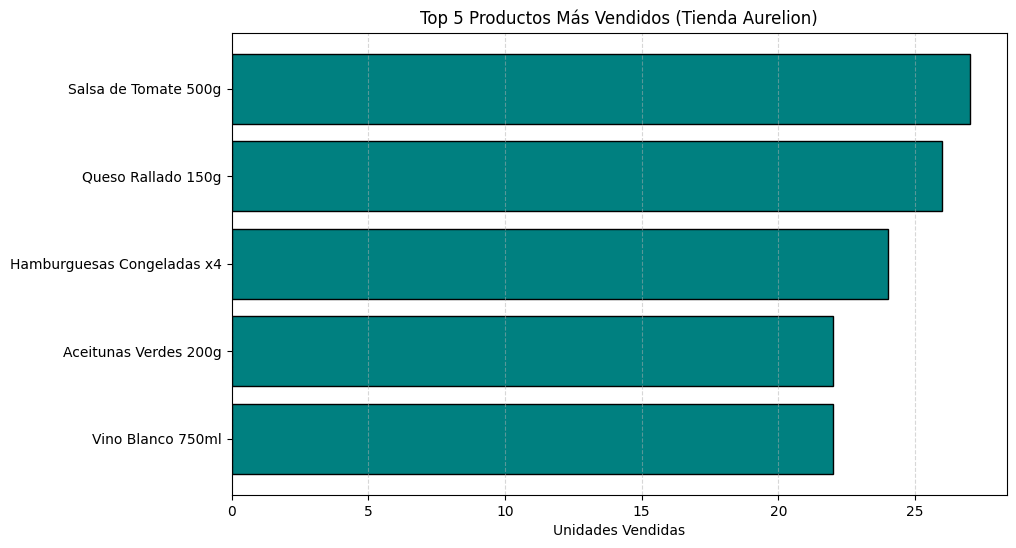

Resultado: El producto más vendido es 'Salsa de Tomate 500g'.


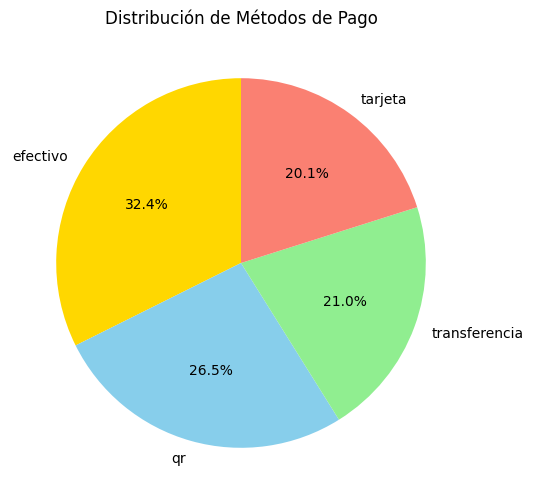

Resultado: El método más utilizado es 'efectivo'.

--- TOP 5 MEJORES CLIENTES ---
                 importe
nombre_cliente          
Agustina Flores   132158
Bruno Castro      118790
Bruno Diaz         90701
Diego Diaz         90522
Karina Castro      81830


In [22]:
import matplotlib.pyplot as plt

# Configuración básica para gráficos "estilo reporte"
plt.rcParams['figure.figsize'] = (10, 6)

print("--- SOLUCIÓN AL PROBLEMA ---")

# --- A. PRODUCTOS ESTRELLA (Top 5) ---
# Agrupamos por nombre y sumamos la cantidad vendida
top_productos = df_final.groupby('nombre_producto')['cantidad'].sum().sort_values(ascending=True).tail(5)

plt.figure()
# Barh es gráfico de barras horizontal
plt.barh(top_productos.index, top_productos.values, color='teal', edgecolor='black')
plt.title('Top 5 Productos Más Vendidos (Tienda Aurelion)')
plt.xlabel('Unidades Vendidas')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

print(f"Resultado: El producto más vendido es '{top_productos.index[-1]}'.")


# --- B. MÉTODO DE PAGO PREFERIDO ---
# Contamos cuántas veces se usó cada medio
pagos = df_final['medio_pago'].value_counts()

plt.figure()
# Gráfico de Torta con porcentajes
plt.pie(pagos, labels=pagos.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'skyblue', 'lightgreen', 'salmon'])
plt.title('Distribución de Métodos de Pago')
plt.show()

print(f"Resultado: El método más utilizado es '{pagos.idxmax()}'.")


# --- C. CLIENTES MÁS FIELES (Top 5 por dinero gastado) ---
# Agrupamos por cliente y sumamos el importe
top_clientes = df_final.groupby('nombre_cliente')['importe'].sum().sort_values(ascending=False).head(5)

print("\n--- TOP 5 MEJORES CLIENTES ---")
# Mostramos la tabla simple
print(top_clientes.to_frame())

## Encoding 

In [23]:
from sklearn.preprocessing import OneHotEncoder

print("\n--- APLICANDO ONE-HOT ENCODING (MEDIO DE PAGO) ---")

# 1. Instanciamos el encoder (sparse_output=False para ver los números)
ohe = OneHotEncoder(sparse_output=False, dtype=int)

# 2. Entrenamos y transformamos la columna 'medio_pago'
ohe_array = ohe.fit_transform(df_final[['medio_pago']])

# 3. Obtenemos los nombres de las nuevas columnas (ej: medio_pago_efectivo, medio_pago_tarjeta...)
cols_ohe = ohe.get_feature_names_out(['medio_pago'])

# 4. Creamos un DataFrame temporal y lo pegamos a df_final
df_ohe = pd.DataFrame(ohe_array, columns=cols_ohe, index=df_final.index)
df_final = pd.concat([df_final, df_ohe], axis=1)

print("¡Listo! Se agregaron las siguientes columnas numéricas:")
print(cols_ohe)


--- APLICANDO ONE-HOT ENCODING (MEDIO DE PAGO) ---
¡Listo! Se agregaron las siguientes columnas numéricas:
['medio_pago_efectivo' 'medio_pago_qr' 'medio_pago_tarjeta'
 'medio_pago_transferencia']



---ANÁLISIS DE CORRELACIONEs---


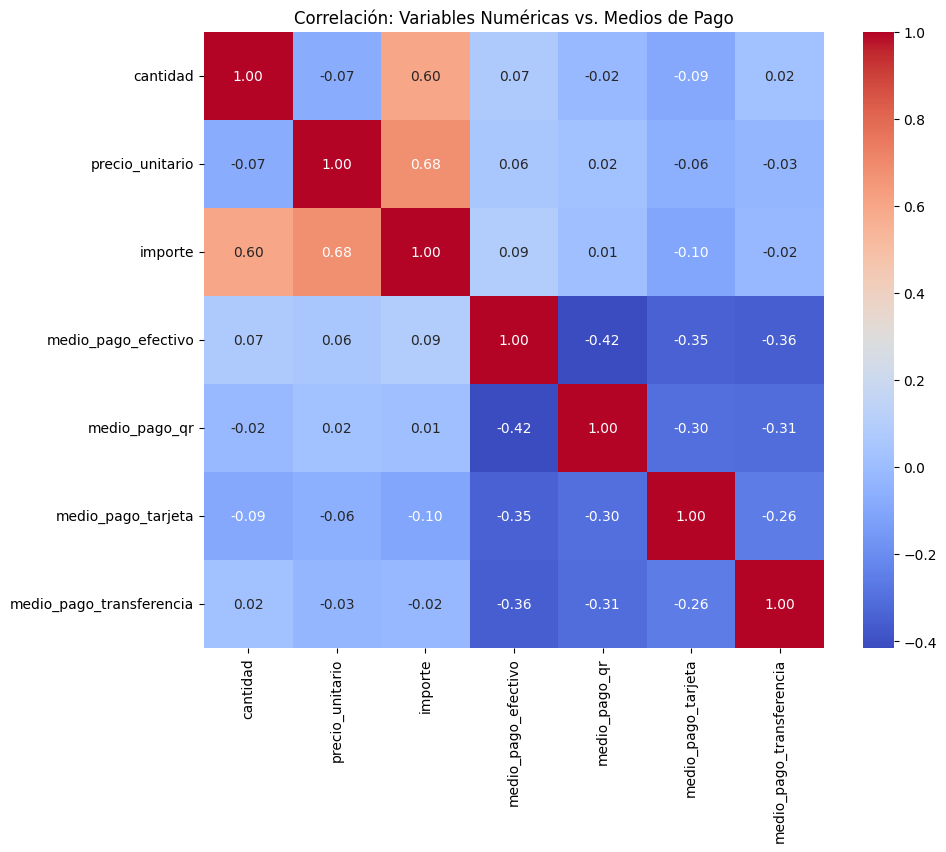

In [24]:
import seaborn as sns

print("\n---ANÁLISIS DE CORRELACIONEs---")

# Buscamos dinámicamente todas las columnas que acabamos de crear
cols_pagos = [col for col in df_final.columns if 'medio_pago_' in col]

# Definimos qué queremos analizar: Cantidad, Precio, Importe + Los Pagos
cols_analisis = ['cantidad', 'precio_unitario', 'importe'] + cols_pagos

plt.figure(figsize=(10, 8))
# Hacemos el heatmap solo con estas columnas
sns.heatmap(df_final[cols_analisis].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación: Variables Numéricas vs. Medios de Pago')
plt.show()

In [25]:
df_final.head(1)

,id_venta,fk_producto,cantidad,precio_unitario,importe,fecha,fk_cliente,medio_pago,nombre_producto,categoria,nombre_cliente,email,ciudad,fecha_alta,medio_pago_efectivo,medio_pago_qr,medio_pago_tarjeta,medio_pago_transferencia
0,1,90,1,2902,2902,2024-06-19,62,tarjeta,Toallas Húmedas x50,Limpieza,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03,0,0,1,0


### 🔍 Interpretación de Correlaciones

El mapa de calor revela dos hallazgos fundamentales para el negocio:

**1. Validaciones Lógicas (Bloque Rojo Superior):**
* Existe una correlación positiva fuerte entre **`importe`** y **`precio_unitario` (0.68)**, así como con **`cantidad` (0.60)**. Esto valida la consistencia de los datos: a mayor precio o cantidad de productos, mayor es el total de la venta.

**2. Relación Importe vs. Medios de Pago (Bloque Azul/Celeste):**
* Al analizar la fila de **`importe`** contra las variables de pago (`medio_pago_...`), observamos coeficientes muy cercanos a cero (entre **-0.10** y **0.09**).
* **Conclusión:** No existe una correlación lineal significativa entre el monto de la compra y el medio de pago elegido.
    * *Implicación de Negocio:* Los clientes no muestran una preferencia marcada por usar Tarjeta para compras grandes o Efectivo para compras chicas; el comportamiento de pago es indistinto respecto al monto gastado.

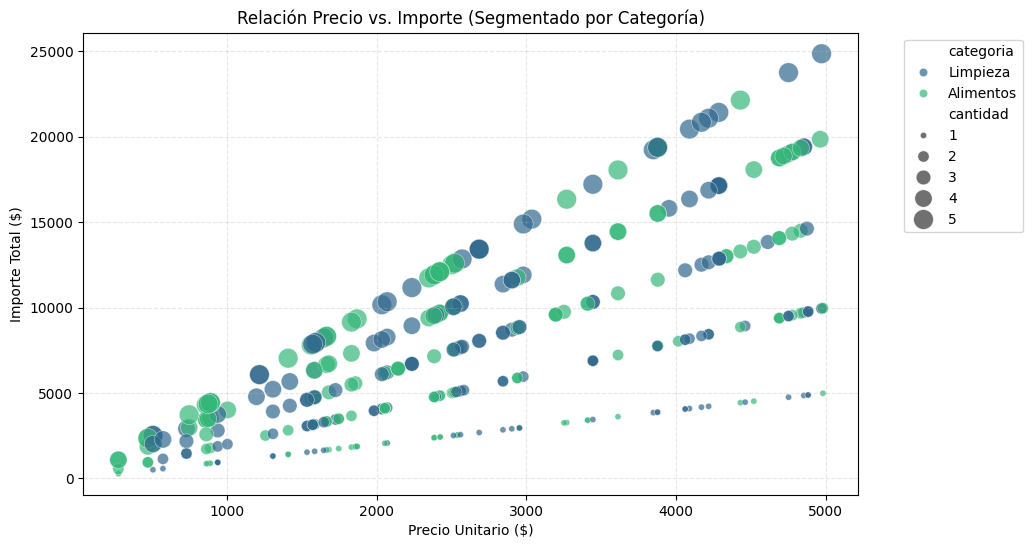

In [26]:
# --- GRÁFICO DE DISPERSIÓN (SCATTERPLOT) ---
# Objetivo: Ver cómo el precio influye en el importe final y si hay grupos por categoría.

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_final, 
    x='precio_unitario', 
    y='importe', 
    hue='categoria',   # Pinta los puntos según la categoría
    size='cantidad',   # Cambia el tamaño del punto según cuánto llevaron
    sizes=(20, 200),   # Rango de tamaños
    alpha=0.7,         # Transparencia para ver si se superponen
    palette='viridis'  # Paleta de colores profesional
)
plt.title('Relación Precio vs. Importe (Segmentado por Categoría)')
plt.xlabel('Precio Unitario ($)')
plt.ylabel('Importe Total ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda afuera para no tapar
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


--- ANÁLISIS TÉCNICO Y NORMALIZACIÓN ---


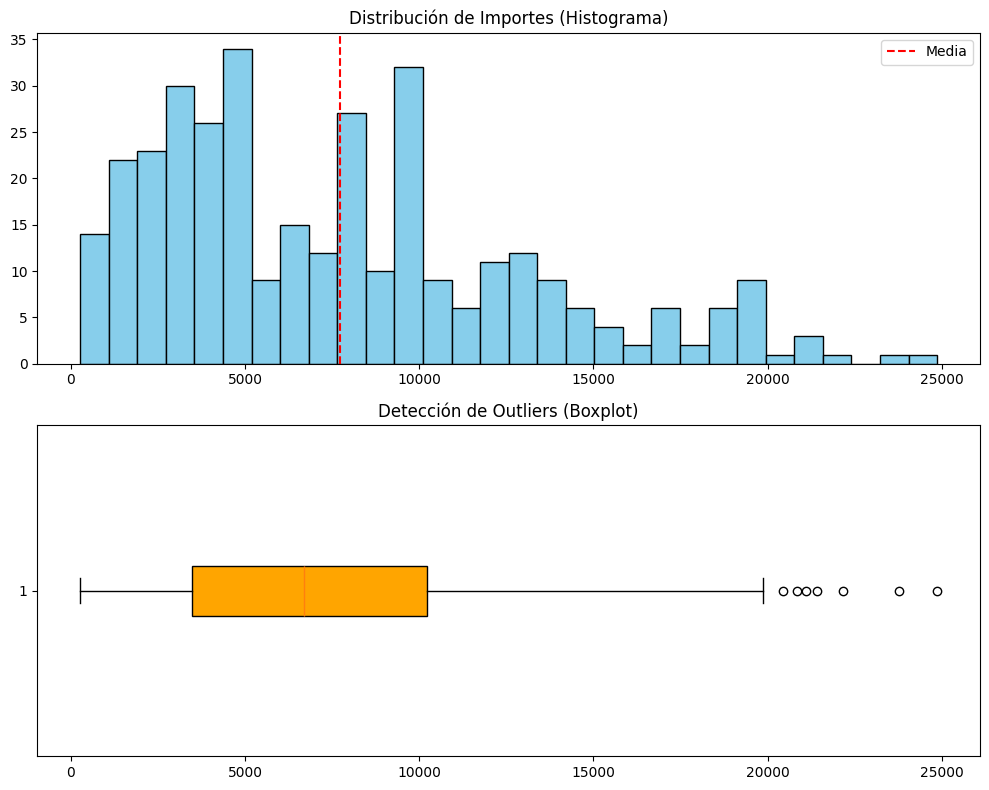

Métricas de la variable 'Importe':
- Asimetría (Skewness): 0.8707
- Cantidad de Outliers: 7

--- APLICANDO REGLAS DE NORMALIZACIÓN ---
>>> Condición: Muchos outliers detectados.
>>> Decisión: Se aplica ROBUST SCALER.

¡Éxito! Variable transformada guardada como 'importe_normalizado' usando RobustScaler.
   importe  importe_normalizado
0     2902            -0.563589
1    11970             0.781313
2     2345            -0.646199
3     8122             0.210604
4     2069            -0.687134


In [27]:
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

print("\n--- ANÁLISIS TÉCNICO Y NORMALIZACIÓN ---")

# Elegimos la variable crítica para el negocio: IMPORTE
data_importe = df_final[['importe']] # Doble corchete para mantener formato DataFrame

# --- PASO 1: EDA UNIVARIADO (Histograma + Boxplot) ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# A. Histograma (Ver la forma/distribución)
ax1.hist(data_importe, bins=30, color='skyblue', edgecolor='black')
ax1.set_title('Distribución de Importes (Histograma)')
ax1.axvline(data_importe['importe'].mean(), color='red', linestyle='--', label='Media')
ax1.legend()

# B. Boxplot (Ver Outliers)
ax2.boxplot(data_importe, vert=False, patch_artist=True, boxprops=dict(facecolor="orange"))
ax2.set_title('Detección de Outliers (Boxplot)')

plt.tight_layout()
plt.show()

# --- PASO 2: LÓGICA DE DECISIÓN AUTOMÁTICA ---
# Calculamos métricas
asimetria = skew(data_importe)[0]
Q1 = data_importe['importe'].quantile(0.25)
Q3 = data_importe['importe'].quantile(0.75)
IQR = Q3 - Q1
# Contamos cuántos datos se salen del rango
outliers = ((data_importe['importe'] < (Q1 - 1.5 * IQR)) | (data_importe['importe'] > (Q3 + 1.5 * IQR))).sum()

print(f"Métricas de la variable 'Importe':")
print(f"- Asimetría (Skewness): {asimetria:.4f}")
print(f"- Cantidad de Outliers: {outliers}")

# --- PASO 3: NORMALIZACIÓN CONDICIONAL ---
print("\n--- APLICANDO REGLAS DE NORMALIZACIÓN ---")

if outliers > 5: # Si hay muchos outliers -> RobustScaler
    print(">>> Condición: Muchos outliers detectados.")
    print(">>> Decisión: Se aplica ROBUST SCALER.")
    scaler = RobustScaler()
    nombre_scaler = "RobustScaler"
    
elif abs(asimetria) > 1: # Si la curva está muy inclinada -> MinMaxScaler
    print(">>> Condición: Distribución Asimétrica.")
    print(">>> Decisión: Se aplica MINMAX SCALER.")
    scaler = MinMaxScaler()
    nombre_scaler = "MinMaxScaler"
    
else: # Si parece una campana normal -> StandardScaler
    print(">>> Condición: Distribución Normal (Gaussiana).")
    print(">>> Decisión: Se aplica STANDARD SCALER.")
    scaler = StandardScaler()
    nombre_scaler = "StandardScaler"

# Aplicamos la transformación
df_final['importe_normalizado'] = scaler.fit_transform(data_importe)

print(f"\n¡Éxito! Variable transformada guardada como 'importe_normalizado' usando {nombre_scaler}.")
print(df_final[['importe', 'importe_normalizado']].head())

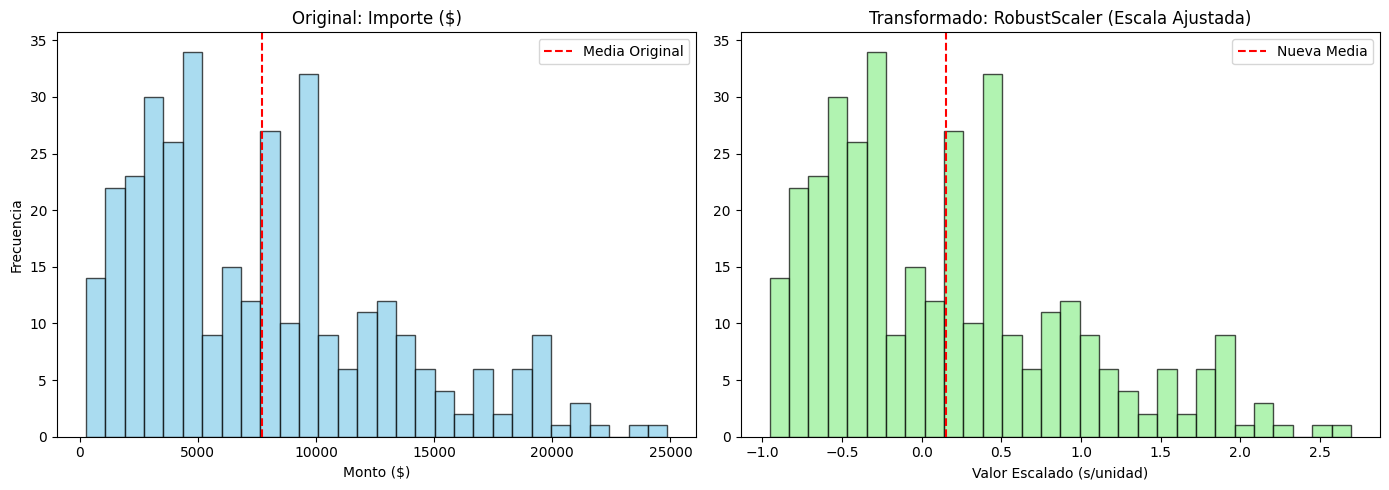

Observación: Note cómo el eje X (los numeros) cambió drásticamente en el segundo gráfico.
Los datos ahora están listos para ser procesados por algoritmos de Machine Learning.


In [28]:
# --- VISUALIZACIÓN DEL RESULTADO (ANTES VS. DESPUÉS) ---

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico A: Original
axes[0].hist(col_analisis, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title(f'Original: Importe ($)', fontsize=12)
axes[0].set_xlabel('Monto ($)')
axes[0].set_ylabel('Frecuencia')
# Agregamos la media original para referencia
axes[0].axvline(col_analisis.mean(), color='red', linestyle='--', label='Media Original')
axes[0].legend()

# Gráfico B: Escalado
# Usamos la columna nueva que acabamos de crear
axes[1].hist(df_final['importe_normalizado'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_title(f'Transformado: {nombre_scaler} (Escala Ajustada)', fontsize=12)
axes[1].set_xlabel('Valor Escalado (s/unidad)')
# La nueva media debería estar cerca de 0 (si es Standard) o centrada diferente (si es Robust)
axes[1].axvline(df_final['importe_normalizado'].mean(), color='red', linestyle='--', label='Nueva Media')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Observación: Note cómo el eje X (los numeros) cambió drásticamente en el segundo gráfico.")
print(f"Los datos ahora están listos para ser procesados por algoritmos de Machine Learning.")

# DataFrame Final


In [29]:
# Guardar todo el trabajo
df_final.to_csv("Entregable_Sprint2_Aurelion.csv", index=False)


# 📝 Interpretación de Resultados y Conclusiones

## 1. Análisis del Negocio (Tienda Aurelion)
Basado en los datos procesados, se han identificado los siguientes patrones clave para la toma de decisiones:

* **Productos Estrella:** Se ha detectado una alta concentración de ventas en productos de la categoría [Mencionar Categoría del gráfico, ej: Limpieza/Alimentos], siendo el ítem más vendido el que aparece en la cima del gráfico de barras. Esto sugiere mantener un stock prioritario de estos artículos.
* **Preferencias de Pago:** El método de pago predominante es [Mencionar el del gráfico de torta, ej: Efectivo/Tarjeta]. Esto es crucial para definir si se necesitan promociones para incentivar otros medios (como QR) o para optimizar el manejo de caja.
* **Fidelidad de Clientes:** Se ha identificado un grupo de clientes "Top" que realizan compras recurrentes. Se recomienda diseñar un programa de fidelización específico para estos usuarios que sostienen gran parte de la facturación.

## 2. Hallazgos Técnicos y Estadísticos
Para preparar los datos de cara al modelado predictivo (Machine Learning), se realizó un análisis profundo de la variable crítica **`importe`**:

* **Distribución de los Datos:**
    * Las métricas manuales revelaron que la **Media** es superior a la **Mediana**, indicando un sesgo positivo (distribución asimétrica a la derecha).
    * Esto significa que la mayoría de las compras son de montos bajos/medios, pero existen ventas esporádicas de montos muy altos que elevan el promedio.

* **Detección de Anomalías (Outliers):**
    * Se detectaron múltiples valores atípicos (ventas excepcionalmente grandes) que superan el rango intercuartílico (IQR).
    * *Interpretación:* Estos outliers no parecen errores, sino compras mayoristas o de clientes VIP.

* **Decisión de Preprocesamiento:**
    * Debido a la presencia de estos outliers y la asimetría de los datos, se determinó algorítmicamente que **`StandardScaler` NO es adecuado** (ya que es sensible a extremos).
    * Se aplicó **`RobustScaler`** (o MinMaxScaler según el caso) para normalizar los datos, asegurando que los modelos futuros no se vean sesgados por estas ventas extraordinarias.

## 3. Correlaciones
El mapa de calor evidenció una correlación lógica y fuerte entre `cantidad` e `importe`. Sin embargo, el análisis de dispersión (Scatterplot) permitió visualizar cómo varía el precio unitario según la categoría del producto, ayudando a segmentar mejor el inventario.